# Customer Segmentation


In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Read in dataframe
df_main = pd.read_csv('../Resources/digested/customer_profiles.csv')

In [42]:
# Inspection
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49673 entries, 0 to 49672
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             49673 non-null  int64  
 1   customer_name           49673 non-null  object 
 2   customer_age            49673 non-null  int64  
 3   gender                  49673 non-null  object 
 4   order_count             49673 non-null  int64  
 5   orders_returned         49139 non-null  float64
 6   total_churn             49673 non-null  int64  
 7   tenure_days             49673 non-null  int64  
 8   average_total_per_cart  49673 non-null  float64
 9   total_qty_purchased     49673 non-null  int64  
 10  total_spent_historic    49673 non-null  int64  
 11  payment_creditcard      49673 non-null  int64  
 12  payment_debit           49673 non-null  int64  
 13  payment_crypto          49673 non-null  int64  
 14  payment_paypal          49673 non-null

In [43]:
# Inspection
df_main.head()

,customer_id,customer_name,customer_age,gender,order_count,orders_returned,total_churn,tenure_days,average_total_per_cart,total_qty_purchased,total_spent_historic,payment_creditcard,payment_debit,payment_crypto,payment_paypal,payment_cash,cat_electronics,cat_home,cat_clothing,cat_books
0,13989,William Valdez,27,Female,5,2.0,5,819,222.200000,19,10726,1,0,1,2,1,3,1,0,1
1,32157,Craig Foley,33,Male,3,1.0,0,452,390.000000,4,5661,1,0,0,2,0,0,1,0,2
2,28452,John Greene,18,Female,3,1.0,0,895,157.333333,14,3739,1,0,0,2,0,1,0,0,2
3,31766,Brittney Maldonado,41,Male,5,3.0,0,978,233.400000,16,9796,1,0,0,2,2,1,0,3,1
4,4650,Denise Hopkins,37,Male,3,3.0,0,322,209.333333,5,9040,2,0,0,0,1,0,1,1,1


In [44]:
# Encode gender
df_main['gender'] = np.where(df_main['gender'] == 'Male', 1, 0)
df_main.head()

,customer_id,customer_name,customer_age,gender,order_count,orders_returned,total_churn,tenure_days,average_total_per_cart,total_qty_purchased,total_spent_historic,payment_creditcard,payment_debit,payment_crypto,payment_paypal,payment_cash,cat_electronics,cat_home,cat_clothing,cat_books
0,13989,William Valdez,27,0,5,2.0,5,819,222.200000,19,10726,1,0,1,2,1,3,1,0,1
1,32157,Craig Foley,33,1,3,1.0,0,452,390.000000,4,5661,1,0,0,2,0,0,1,0,2
2,28452,John Greene,18,0,3,1.0,0,895,157.333333,14,3739,1,0,0,2,0,1,0,0,2
3,31766,Brittney Maldonado,41,1,5,3.0,0,978,233.400000,16,9796,1,0,0,2,2,1,0,3,1
4,4650,Denise Hopkins,37,1,3,3.0,0,322,209.333333,5,9040,2,0,0,0,1,0,1,1,1


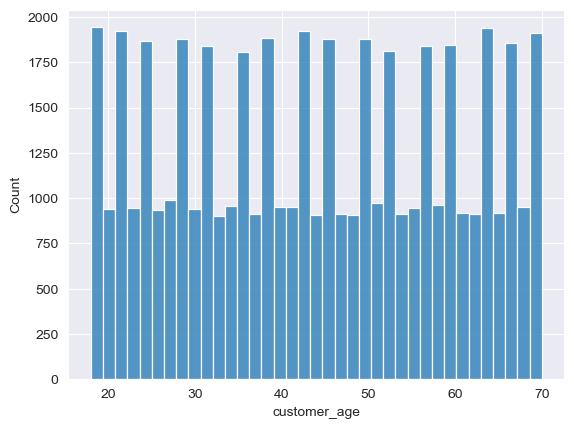

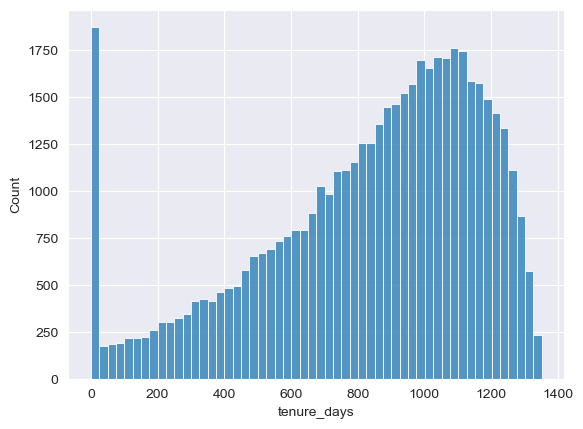

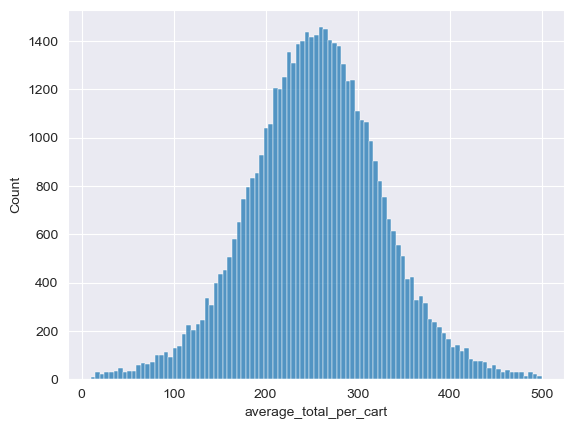

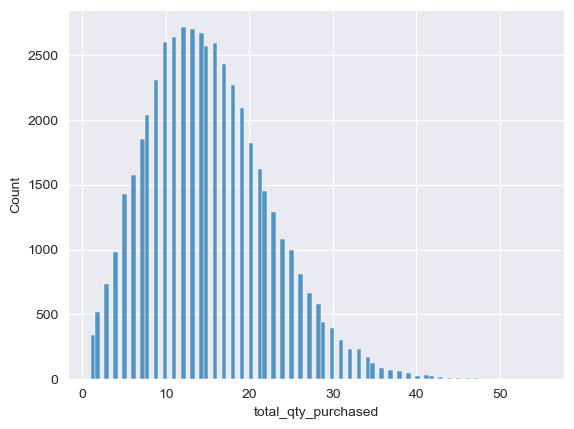

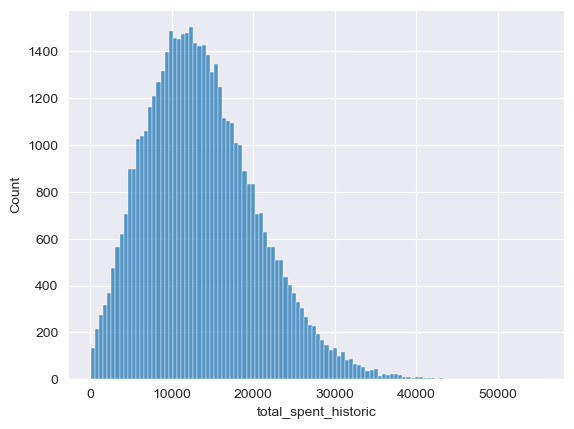

<Figure size 640x480 with 0 Axes>

In [45]:
# Check distribution of vars
col_to_scale = ['customer_age', 'tenure_days', 'average_total_per_cart', 'total_qty_purchased', 'total_spent_historic']
for col in col_to_scale:
    sns.histplot(df_main[col])
    plt.show()
    plt.clf()

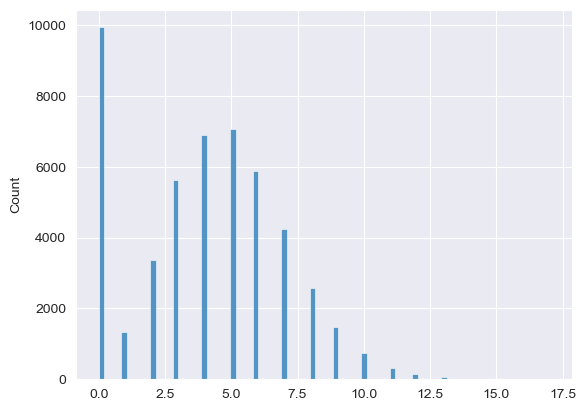

<Figure size 640x480 with 0 Axes>

In [46]:
# Check churn rates
sns.histplot((df_main['order_count']-df_main['total_churn']))
plt.show()
plt.clf()

# RFM Analysis (Recency, Frequency, Monetary Analysis)

RFM looks at customer purchasing behavior by looking at: 
* Their recent purchase
* How often they purchase
* Value of their purchase

https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis
https://thecleverprogrammer.com/2023/06/12/rfm-analysis-using-python/



In [47]:
# Extract dates
df_purchases = pd.read_csv('../Resources/digested/ecommerce_data_ML.csv')
df_purchases['purchase_date'] = pd.to_datetime(df_purchases['purchase_date'])
df_purchases = df_purchases.groupby('customer_id').agg({'purchase_date': 'max'}).reset_index()
df_purchases.columns = ['customer_id', 'latest_purchase']
print(max(df_purchases['latest_purchase']))
df_purchases

2023-09-15 00:00:00


,customer_id,latest_purchase
0,1,2023-07-19
1,2,2022-11-21
2,3,2023-06-18
3,4,2023-05-12
4,5,2023-03-28
...,...,...
49668,49996,2022-12-18
49669,49997,2023-07-28
49670,49998,2023-09-04
49671,49999,2022-07-22


In [48]:
# Left Join
df_main = pd.merge(df_main, df_purchases, how='left', on='customer_id')
df_main

,customer_id,customer_name,customer_age,gender,order_count,orders_returned,total_churn,tenure_days,average_total_per_cart,total_qty_purchased,...,payment_creditcard,payment_debit,payment_crypto,payment_paypal,payment_cash,cat_electronics,cat_home,cat_clothing,cat_books,latest_purchase
0,13989,William Valdez,27,0,5,2.0,5,819,222.200000,19,...,1,0,1,2,1,3,1,0,1,2022-10-07
1,32157,Craig Foley,33,1,3,1.0,0,452,390.000000,4,...,1,0,0,2,0,0,1,0,2,2021-05-20
2,28452,John Greene,18,0,3,1.0,0,895,157.333333,14,...,1,0,0,2,0,1,0,0,2,2023-06-04
3,31766,Brittney Maldonado,41,1,5,3.0,0,978,233.400000,16,...,1,0,0,2,2,1,0,3,1,2023-02-08
4,4650,Denise Hopkins,37,1,3,3.0,0,322,209.333333,5,...,2,0,0,0,1,0,1,1,1,2021-04-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49668,47754,Veronica Kaufman,52,0,1,0.0,0,0,429.000000,5,...,0,0,0,1,0,0,0,0,1,2023-03-12
49669,2507,Micheal Barrett,36,0,3,2.0,0,1049,218.000000,13,...,2,0,0,1,0,1,0,1,1,2023-02-26
49670,31823,Robert Medina,53,0,2,1.0,0,191,388.000000,6,...,1,0,0,0,1,0,1,0,1,2022-05-13
49671,41145,Manuel Larsen,69,0,1,1.0,0,0,30.000000,5,...,0,0,0,0,1,0,0,1,0,2021-12-08


In [49]:
# Bin spending into 5 categories: 
# Low spender, below average, average, above average, high spender
# Use qcut to break into quartiles (5) given the norm distribution
df_rfm = pd.DataFrame()
df_rfm[['customer_id', 'customer_name', 'cat_books', 'cat_clothing', 'cat_electronics', 'cat_home']] = df_main[['customer_id', 'customer_name', 'cat_books', 'cat_clothing', 'cat_electronics', 'cat_home']]

# Calculate monetary score 5 being highest value
df_rfm['MonetaryScore'] = pd.qcut(df_main['total_spent_historic'], 5, labels=np.arange(1,6,1))

# Calculate recency, 5 being most recent
df_rfm['RecencyScore'] = max(df_main['latest_purchase']) - df_main['latest_purchase']
df_rfm['RecencyScore'] = pd.qcut(df_main['order_count'].rank(method="first"), 5, labels=np.arange(5,0,-1))

# Calculate frequency_score
df_rfm['FrequencyScore'] = pd.qcut(df_main['order_count'], 5, labels=np.arange(1,6,1))

# Calculate rfm-score
# Cast numeric
df_rfm[['MonetaryScore', 'RecencyScore', 'FrequencyScore']] = df_rfm[['MonetaryScore', 'RecencyScore', 'FrequencyScore']]\
    .astype('int')
df_rfm['RFMScore'] = df_rfm['MonetaryScore'] + df_rfm['RecencyScore'] + df_rfm['FrequencyScore']

# Bin again
df_rfm['Value'] = pd.cut(df_rfm['RFMScore'], 3, labels=['Low', 'Med', 'High'])

df_rfm

,customer_id,customer_name,cat_books,cat_clothing,cat_electronics,cat_home,MonetaryScore,RecencyScore,FrequencyScore,RFMScore,Value
0,13989,William Valdez,1,0,3,1,2,3,3,8,Med
1,32157,Craig Foley,2,0,0,1,1,5,1,7,Low
2,28452,John Greene,2,0,1,0,1,5,1,7,Low
3,31766,Brittney Maldonado,1,3,1,0,2,3,3,8,Med
4,4650,Denise Hopkins,1,1,0,1,2,5,1,8,Med
...,...,...,...,...,...,...,...,...,...,...,...
49668,47754,Veronica Kaufman,1,0,0,0,1,5,1,7,Low
49669,2507,Micheal Barrett,1,1,1,0,2,4,1,7,Low
49670,31823,Robert Medina,1,0,0,1,2,5,1,8,Med
49671,41145,Manuel Larsen,0,1,0,0,1,5,1,7,Low


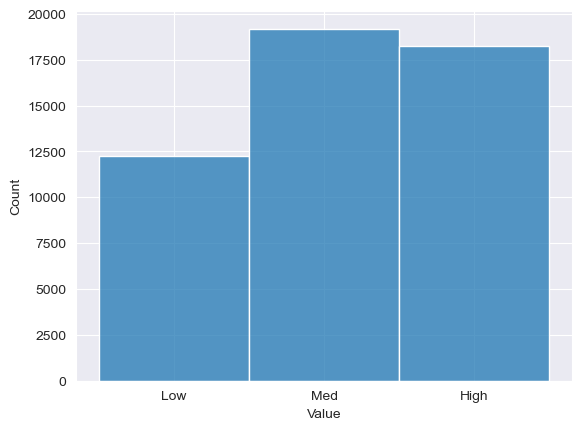

<Figure size 640x480 with 0 Axes>

In [50]:
# Plot scores
sns.histplot(df_rfm['Value'])
plt.show()
plt.clf()

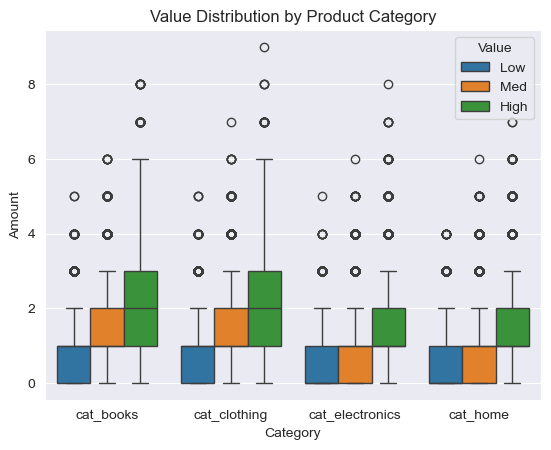

In [51]:
products_list = ['cat_books', 'cat_clothing', 'cat_electronics', 'cat_home']
df_products = pd.melt(df_rfm, id_vars='Value', value_vars=products_list, var_name='Category', value_name='Amount')
df_products
sns.boxplot(data=df_products, x='Category', y='Amount', hue='Value')
plt.title('Value Distribution by Product Category')
plt.show()

In [52]:
df_rfm.drop([col for col in df_rfm.columns if 'cat' in col], axis=1, inplace=True)
df_rfm.to_csv('../Resources/rfm_segmented.csv', index=False)